# 02. K-Means Clustering
> K 평균 군집 분석 

## 환경 설정

라이브러리

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

<br>
<br>

## 1. K-Means Clustering

클러스터링 결과를 분석 목표에 맞게 수정한다.



In [ ]:
scaling_data = pd.read_csv("/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/scaling_data.csv")
sales_data = pd.read_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/sales_data.csv')

In [ ]:
scaling_data = scaling_data.drop(['Unnamed: 0'], axis=1)

분류된 상권의 세부 서비스 업종 분류를 알아보기 위한 세부 데이터 컬럼을 설정하고 `detail_data` 데이터를 뽑아둔다

In [ ]:
detail_columns = ['관광숙박', '교육', '쇼핑', '오락서비스', '음식점', '의료', '의류잡화', '카페']
detail_data = scaling_data[detail_columns].groupby(scaling_data['상권_코드_명']).mean()

상권 분류 클러스터링을 위해 수치형 데이터인 `num_data` 데이터를 뽑아둔다

In [ ]:
num_columns = ['총_생활인구_수', '총_직장_인구_수', '아파트_단지_수', '집객시설_수', '교통시설_수', '학교_수', '총_상주인구_수']
num_data = scaling_data[num_columns].groupby(scaling_data['상권_코드_명']).mean()

<br>

### 1-1. 클러스터의 개수 k 설정

In [ ]:
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(num_data)
    wss.append(kmeans.inertia_)

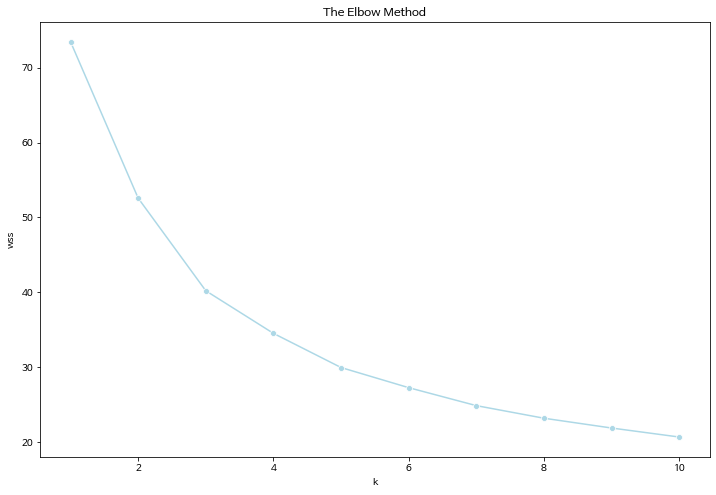

In [ ]:
plt.figure(figsize= (12, 8))
sns.lineplot(range(1, 11), wss, marker='o', color='lightblue')
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('wss')
plt.show()

In [ ]:
best_n = 1 
best_score = -1

for n_cluster in range(2, 11): 
  kmeans = KMeans(n_clusters=n_cluster) 
  kmeans.fit(num_data) 
  cluster = kmeans.predict(num_data) 
  score = silhouette_score(num_data, cluster)

  print('k = {} 일 때의 실루엣 점수 : {:.2f}'.format(n_cluster, score))

  if score > best_score :
      best_n = n_cluster
      best_score = score

print('k = {} 일 때 가장 높은 실루엣 점수 {:.2f}을 얻는다'.format(best_n, best_score))

k = 2 일 때의 실루엣 점수 : 0.36
k = 3 일 때의 실루엣 점수 : 0.37
k = 4 일 때의 실루엣 점수 : 0.30
k = 5 일 때의 실루엣 점수 : 0.31
k = 6 일 때의 실루엣 점수 : 0.25
k = 7 일 때의 실루엣 점수 : 0.27
k = 8 일 때의 실루엣 점수 : 0.27
k = 9 일 때의 실루엣 점수 : 0.22
k = 10 일 때의 실루엣 점수 : 0.21
k = 3 일 때 가장 높은 실루엣 점수 0.37을 얻는다


k = 3 일 때, wss 감소 정도가 가장 크고 실루엣 점수도 가장 크지만 기존의 상권 분석 서비스에서 4개의 상권 분류를 사용하고 있으므로 수월한 비교를 위해 k = 4로 설정하여 진행한다.

<br>

### 1-2. 클러스터링

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster = kmeans.fit_predict(num_data)
cluster

array([1, 1, 1, ..., 2, 1, 2], dtype=int32)

In [ ]:
num_data['cluster'] = cluster

In [ ]:
num_data.head()

,총_생활인구_수,총_직장_인구_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,총_상주인구_수,cluster
상권_코드_명,,,,,,,,
가로공원로58길,0.093507,0.002016,0.012739,0.007389,0.000000,0.0,0.235266,1
가로공원로76가길,0.136968,0.003780,0.161359,0.019704,0.000000,0.0,0.312747,1
가로공원로80길,0.117640,0.006117,0.180467,0.007389,0.000000,0.0,0.281615,1
가마산로61길,0.148102,0.001008,0.016985,0.009852,0.022727,0.0,0.161983,2
가산디지털단지역_2,0.023777,0.577087,0.006369,0.152709,0.431818,0.0,0.057139,0


In [ ]:
num_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/cluster_data.csv')

Text(0, 0.5, '표준 데이터 값')

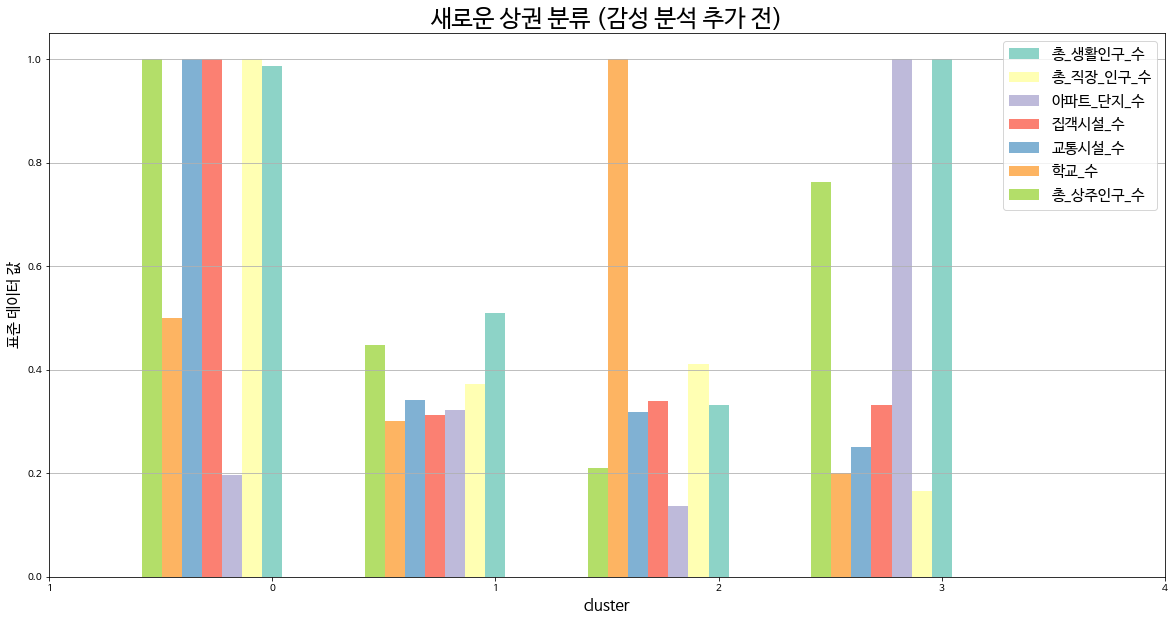

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
color = sns.color_palette("Set3", len(num_data.columns))

for idx, column in enumerate(num_columns):
  plt.bar(num_data['cluster'] - idx * 0.09, num_data[column], label=column, width=0.09, color=color[idx])

plt.title('새로운 상권 분류 (감성 분석 추가 전)', fontsize=24)
plt.legend(fontsize=15)
plt.grid(True, axis='y')
plt.xticks([-1, 0, 1, 2, 3, 4])
plt.xlabel('cluster', fontsize=15)
plt.ylabel('표준 데이터 값', fontsize=15)

<br>
<br>

## 2. K-Means Clustering 결과 분석

### 2-1. Cluster 0 분석 - 노른자

**세부 시설 분석**

In [ ]:
num_data[num_data['cluster'] == 0].to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area0.csv')

In [ ]:
area0 = num_data[num_data['cluster'] == 0].index

In [ ]:
area0_data = pd.DataFrame(columns=detail_columns)

In [ ]:
for area in area0:
  area0_data = area0_data.append(detail_data[detail_data.index == area][detail_columns])

In [ ]:
area0_detail = area0_data.mean()

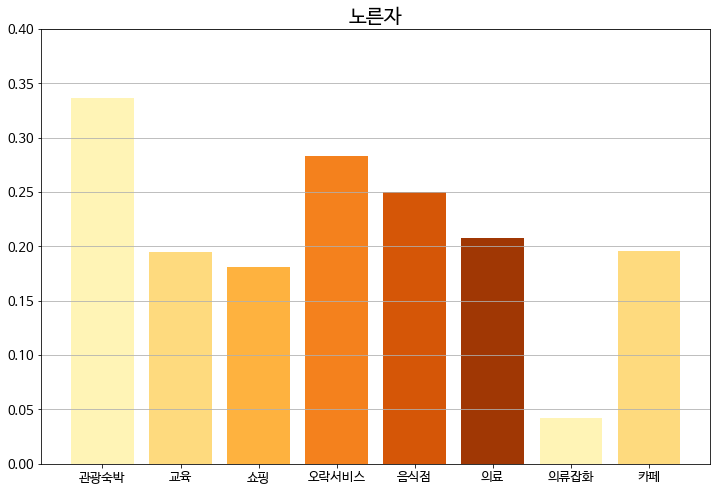

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
color = sns.color_palette("YlOrBr")
plt.title('노른자', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([0, 0.4])
plt.bar(area0_detail.index, area0_detail, color=color)
plt.grid(True, axis='y')

**매출과 이전 상권 분류와의 차이 확인**

In [ ]:
area0_sales_data = pd.DataFrame(columns=['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수'])

In [ ]:
for area in area0:
  area0_sales_data = area0_sales_data.append(sales_data[['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수']][sales_data['상권_코드_명'] == area])

In [ ]:
area0_sales_data.head()

,상권_코드_명,상권_구분_코드_명,매출_금액,매출_건수
991,가산디지털단지역_2,발달상권,3.647797e+11,16450902
992,가산디지털단지역_3,발달상권,9.858932e+11,29600789
994,강남구 논현역_2,발달상권,4.462512e+11,15967853
1006,교대역_1,발달상권,2.692589e+11,9766852
1009,구로디지탈1단지,발달상권,5.310292e+11,23600186


In [ ]:
area0_sales_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area0_sales_data.csv')

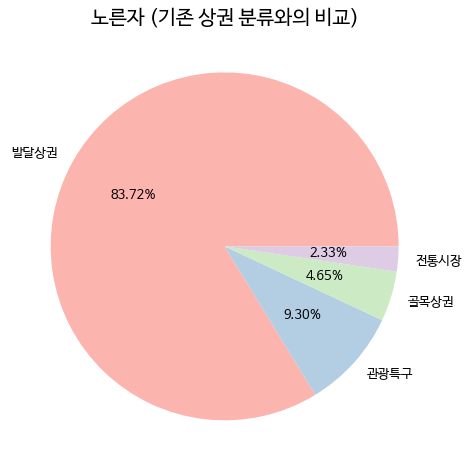

In [ ]:
color = sns.color_palette("Pastel1", 4)
plt.title('노른자 (기존 상권 분류와의 비교)', fontsize=20)
plt.rcParams['font.size'] = 13
plt.pie(area0_sales_data['상권_구분_코드_명'].value_counts(), labels=area0_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')
plt.show()

<br>

### 2-2. Cluster 1 분석 - 스크램블

**세부 시설 분석**

In [ ]:
num_data[num_data['cluster'] == 1].to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area1.csv')

In [ ]:
area1 = num_data[num_data['cluster'] == 1].index

In [ ]:
area1_data = pd.DataFrame(columns=detail_columns)

In [ ]:
for area in area1:
  area1_data = area1_data.append(detail_data[detail_data.index == area][detail_columns])

In [ ]:
area1_detail = area1_data.mean()

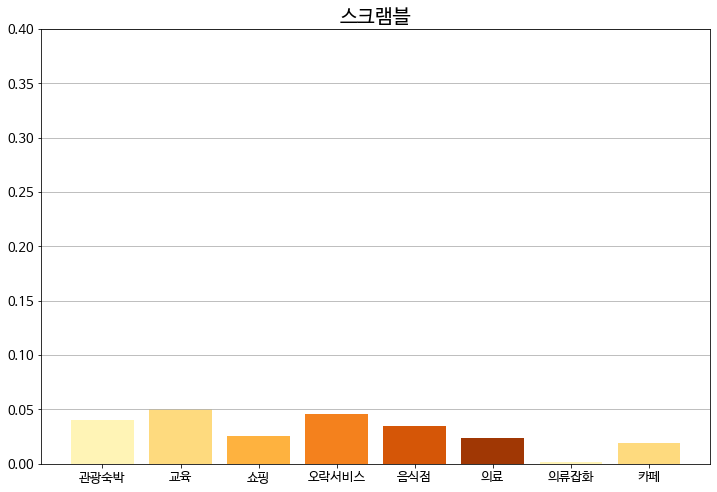

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
color = sns.color_palette("YlOrBr")
plt.title('스크램블', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([0, 0.4])
plt.bar(area1_detail.index, area1_detail, color=color)
plt.grid(True, axis='y')

**매출과 이전 상권 분류와의 차이 확인**

In [ ]:
area1_sales_data = pd.DataFrame(columns=['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수'])

In [ ]:
for area in area1:
  area1_sales_data = area1_sales_data.append(sales_data[['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수']][sales_data['상권_코드_명'] == area])

In [ ]:
area1_sales_data.head()

,상권_코드_명,상권_구분_코드_명,매출_금액,매출_건수
0,가로공원로58길,골목상권,2.616995e+09,228566
1,가로공원로76가길,골목상권,1.012329e+10,722503
2,가로공원로80길,골목상권,1.917132e+10,720964
5,가산로5길,골목상권,1.482576e+10,1353409
6,가재울로6길,골목상권,2.910669e+10,1858077


In [ ]:
area1_sales_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area1_sales_data.csv')

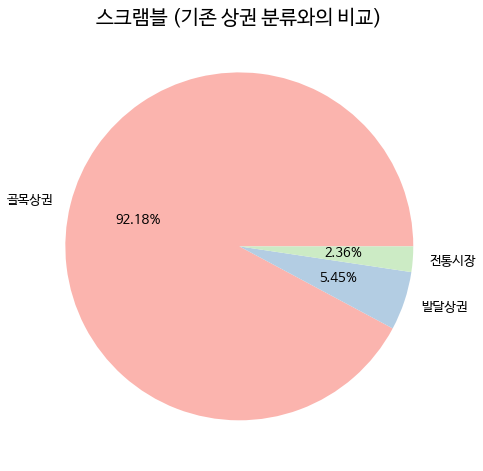

In [ ]:
color = sns.color_palette("Pastel1", 4)
plt.title('스크램블 (기존 상권 분류와의 비교)', fontsize=20)
plt.rcParams['font.size'] = 13
plt.pie(area1_sales_data['상권_구분_코드_명'].value_counts(), labels=area1_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')
plt.show()

<br>

### 2-3. Cluster 2 분석 - 오믈렛

**세부 시설 분석**

In [ ]:
num_data[num_data['cluster'] == 2].to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area2.csv')

In [ ]:
area2 = num_data[num_data['cluster'] == 2].index

In [ ]:
area2_data = pd.DataFrame(columns=detail_columns)

In [ ]:
for area in area2:
  area2_data = area2_data.append(detail_data[detail_data.index == area][detail_columns])

In [ ]:
area2_detail = area2_data.mean()

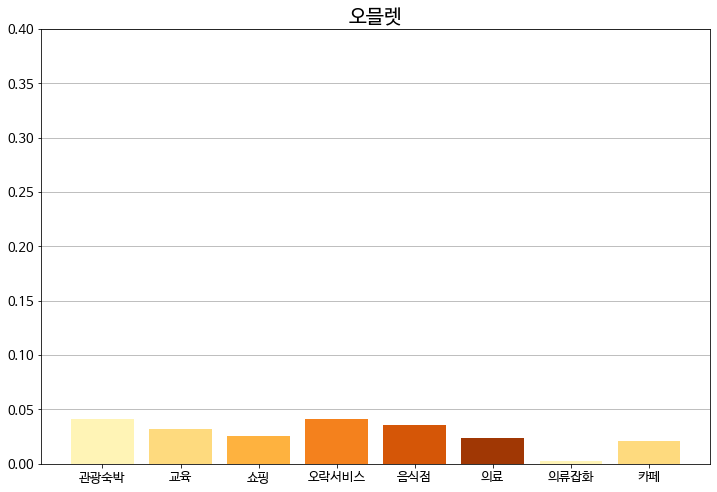

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
color = sns.color_palette("YlOrBr")
plt.title('오믈렛', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([0, 0.4])
plt.bar(area2_detail.index, area2_detail, color=color)
plt.grid(True, axis='y')

**매출과 이전 상권 분류와의 차이 확인**

In [ ]:
area2_sales_data = pd.DataFrame(columns=['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수'])

In [ ]:
for area in area2:
  area2_sales_data = area2_sales_data.append(sales_data[['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수']][sales_data['상권_코드_명'] == area])

In [ ]:
area2_sales_data.head()

,상권_코드_명,상권_구분_코드_명,매출_금액,매출_건수
3,가마산로61길,골목상권,4.668594e+09,277527
4,가산로3길,골목상권,2.983898e+10,719243
1186,강남골목시장,전통시장,2.336485e+10,1541447
995,강남구 논현역_3,발달상권,6.594852e+10,1045236
997,강남구 신사역_1,발달상권,8.480264e+10,2121685


In [ ]:
area2_sales_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area2_sales_data.csv')

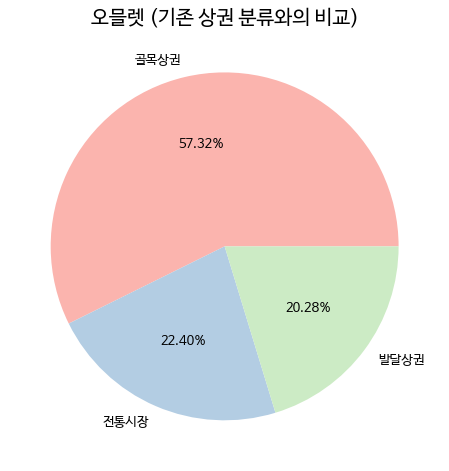

In [ ]:
color = sns.color_palette("Pastel1", 4)
plt.rcParams['font.size'] = 13
plt.title('오믈렛 (기존 상권 분류와의 비교)', fontsize=20)
plt.pie(area2_sales_data['상권_구분_코드_명'].value_counts(), labels=area2_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')
plt.show()

<br>

### 2-4. Cluster 3 분석 - 흰자

**세부 시설 분석**

In [ ]:
num_data[num_data['cluster'] == 3].to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area3.csv')

In [ ]:
area3 = num_data[num_data['cluster'] == 3].index

In [ ]:
area3_data = pd.DataFrame(columns=detail_columns)

In [ ]:
for area in area3:
  area3_data = area3_data.append(detail_data[detail_data.index == area][detail_columns])

In [ ]:
area3_detail = area3_data.mean()

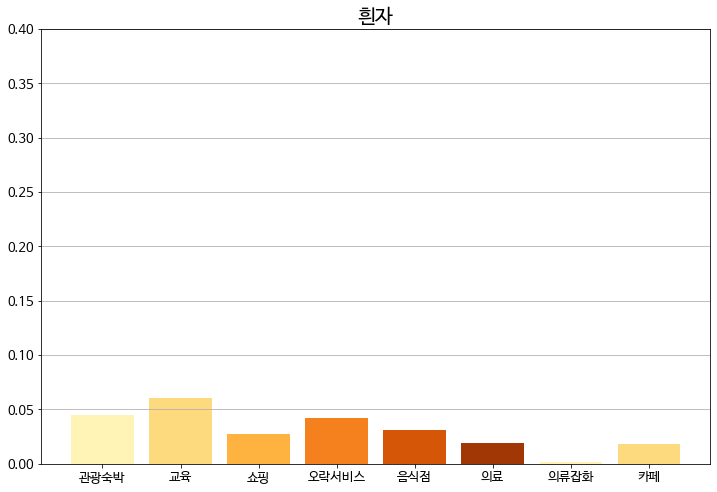

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
color = sns.color_palette("YlOrBr")
plt.title('흰자', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim([0, 0.4])
plt.bar(area3_detail.index, area3_detail, color=color)
plt.grid(True, axis='y')

**매출과 이전 상권 분류와의 차이 확인**

In [ ]:
area3_sales_data = pd.DataFrame(columns=['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수'])

In [ ]:
for area in area3:
  area3_sales_data = area3_sales_data.append(sales_data[['상권_코드_명', '상권_구분_코드_명', '매출_금액', '매출_건수']][sales_data['상권_코드_명'] == area])

In [ ]:
area3_sales_data.head()

,상권_코드_명,상권_구분_코드_명,매출_금액,매출_건수
9,갈현로33길,골목상권,1.095064e+10,801965
17,강남대로8길,골목상권,6.545111e+10,2395016
18,강동대로53길,골목상권,5.107389e+10,1764611
19,강서로15길,골목상권,2.660579e+10,2504811
21,강서로18길,골목상권,2.225821e+10,1849170


In [ ]:
area3_sales_data.to_csv('/content/gdrive/MyDrive/pjt-seoul-market-analysis/data/area3_sales_data.csv')

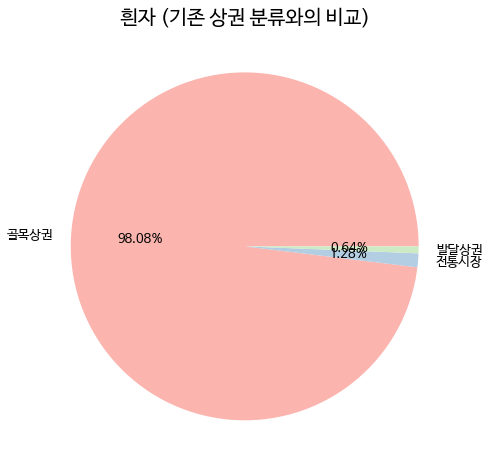

In [ ]:
color = sns.color_palette("Pastel1", 4)
plt.rcParams['font.size'] = 13
plt.title('흰자 (기존 상권 분류와의 비교)', fontsize=20)
plt.pie(area3_sales_data['상권_구분_코드_명'].value_counts(), labels=area3_sales_data['상권_구분_코드_명'].unique(), colors=color, autopct='%.2f%%')
plt.show()

<br>
<br>

## 3. 상권 분류 별 비교

매출 금액, 매출 건수 비교

<br>

### 3-1. 매출 금액 비교

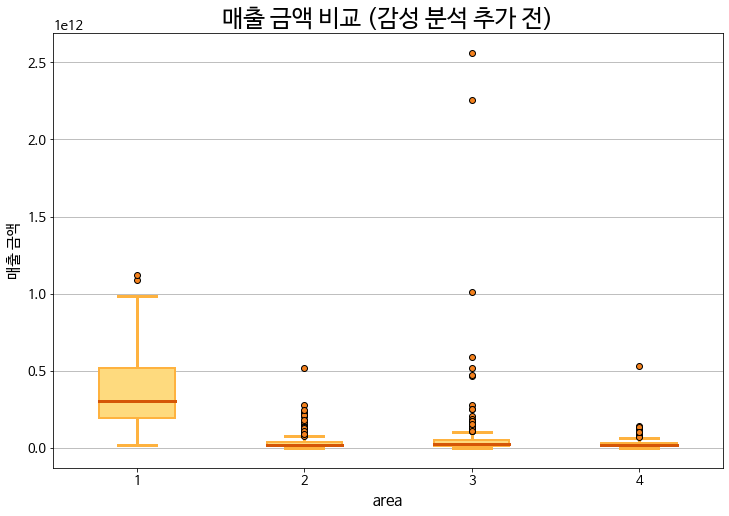

In [ ]:
color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['매출_금액'],area1_sales_data['매출_금액'], area2_sales_data['매출_금액'],area3_sales_data['매출_금액']], 
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('매출 금액 비교 (감성 분석 추가 전)', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('area', fontsize=15)
plt.ylabel('매출 금액', fontsize=15)
plt.show()

<br>

### 3-2. 매출 건수 비교

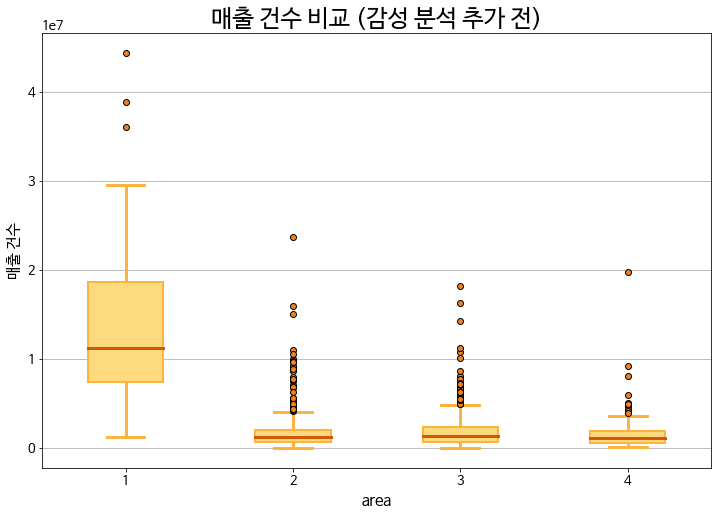

In [ ]:
color = sns.color_palette("YlOrBr")
plt.boxplot([area0_sales_data['매출_건수'],area1_sales_data['매출_건수'], area2_sales_data['매출_건수'],area3_sales_data['매출_건수']], 
            patch_artist=True, ## 박스 안쪽 여백에 색상을 입히기 위해서 반드시 True로 해줘야함
            flierprops=dict(markerfacecolor=color[3]),## 마커테두리 컬러
            medianprops=dict(color=color[4],linewidth=3), ## 중앙선 테두리 컬러
            capprops=dict(color=color[2], linewidth=3), ## 최상단, 최하단 선과 직사각형을 잇는 선 테두리 컬러
            whiskerprops=dict(color=color[2], linewidth=3), ## 세로선 컬러
            boxprops=dict(facecolor=color[1], color=color[2], linewidth=2), ## 박스테두리와 안쪽 여백 컬러
            )

plt.title('매출 건수 비교 (감성 분석 추가 전)', fontsize=24)
plt.grid(True, axis='y')
plt.xlabel('area', fontsize=15)
plt.ylabel('매출 건수', fontsize=15)
plt.show()